In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the data
#df=pd.read_csv('Uber Request Data.csv')
df=pd.read_csv(r'Downloads\Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#Duplicate check - check any data is duplicate
#df[df.duplicated()]
sum(df.duplicated(subset='Request id'))==0

True

In [6]:
#verify the dimensions of dataframe
df.shape

(6745, 6)

In [7]:
#check NA values of each feature in dataframe
print(df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [8]:
#checking the % of NA values columnwise
df.isnull().sum()*100/df.shape[0]

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
#Convert 'Request timestamp' column to datetime object
df['Request timestamp']=df['Request timestamp'].astype(str)
df['Request timestamp']=df['Request timestamp'].str.replace("/","-")
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True)

In [11]:
df["Drop timestamp"] = df["Drop timestamp"].astype(str)
df["Drop timestamp"] = df["Drop timestamp"].str.replace("/","-")
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [13]:
#extract hour information from the request time
req_hour=df['Request timestamp'].dt.hour
#req_hour.value_counts()
df['req_hour']=req_hour

In [14]:
#extract the day from the request time
req_day=df['Request timestamp'].dt.day
#df["req_day"].value_counts()
df["req_day"] = req_day

C:\Users\14144\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


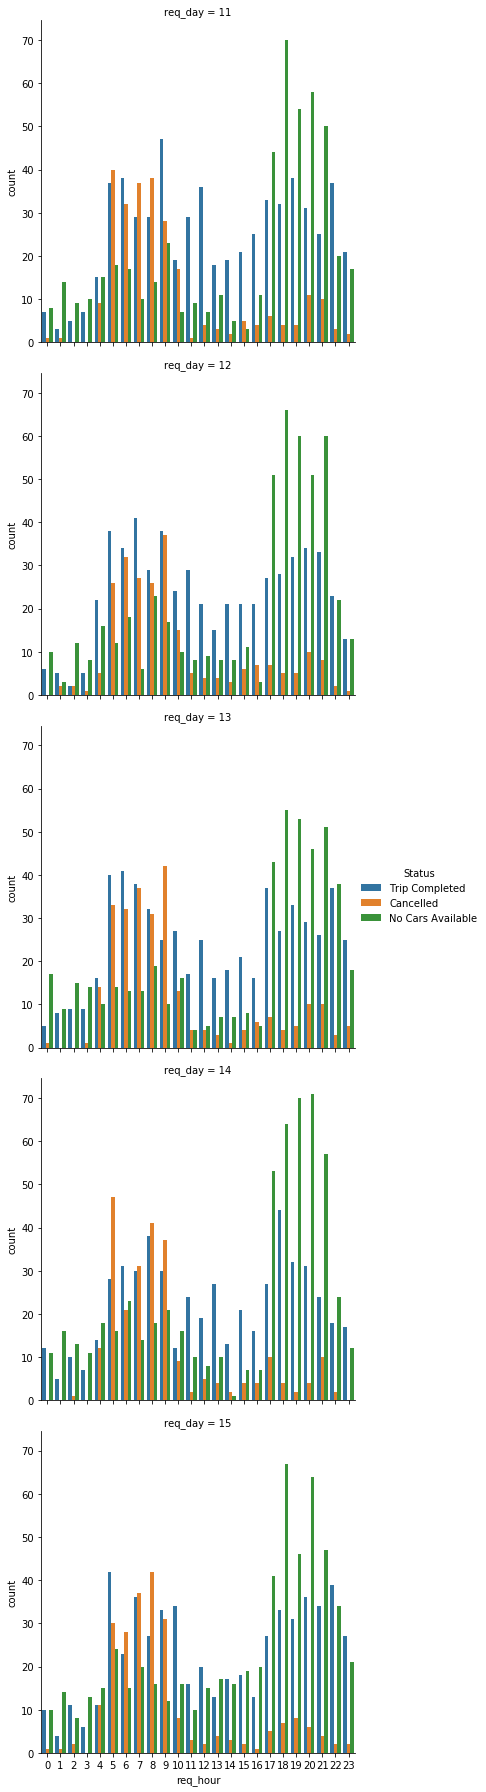

In [15]:
#factor plot hour and day w.r.t status
sns.factorplot(x = "req_hour", hue = "Status", row = "req_day", data = df, kind = "count")

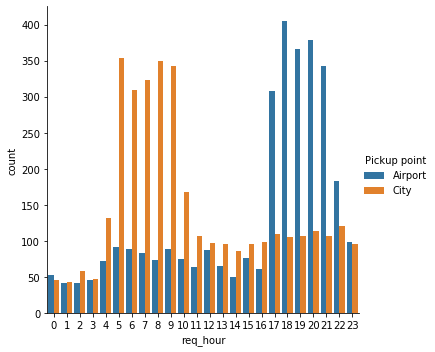

In [16]:
sns.factorplot(x="req_hour",hue='Pickup point',data = df, kind = "count")

In [17]:
#Creating Time slot for various time period of day
def time_period(x):
    if x<5:
        return "Pre-Morning"
    elif 5 <= x < 10:
        return "Morning-Rush"
    elif 10<=x<17:
        return "Day-Time"
    elif 17 <= x < 22:
        return "Evening-Rush"
    else:
        return "Late Night"
    
df['Time_Slot']=df.req_hour.apply(lambda x:time_period(x))

In [18]:
df['Time_Slot'].value_counts()

Evening-Rush    2342
Morning-Rush    2103
Day-Time        1224
Pre-Morning      578
Late Night       498
Name: Time_Slot, dtype: int64

In [21]:
#another way to look at the trips made in each time slot
print (df.Time_Slot[df.Time_Slot == "Pre-Morning"].value_counts())
print (df.Time_Slot[df.Time_Slot == "Morning-Rush"].value_counts())
print (df.Time_Slot[df.Time_Slot == "Day-Time"].value_counts())
print (df.Time_Slot[df.Time_Slot == "Evening-Rush"].value_counts())
print (df.Time_Slot[df.Time_Slot == "Late Night"].value_counts())
    


Pre-Morning    578
Name: Time_Slot, dtype: int64
Morning-Rush    2103
Name: Time_Slot, dtype: int64
Day-Time    1224
Name: Time_Slot, dtype: int64
Evening-Rush    2342
Name: Time_Slot, dtype: int64
Late Night    498
Name: Time_Slot, dtype: int64


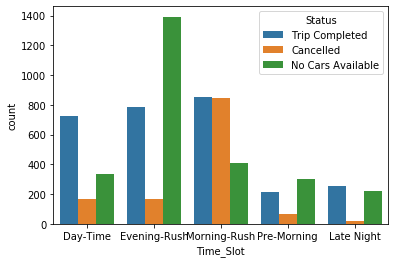

In [23]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.countplot(x = "Time_Slot", hue = "Status", data = df)

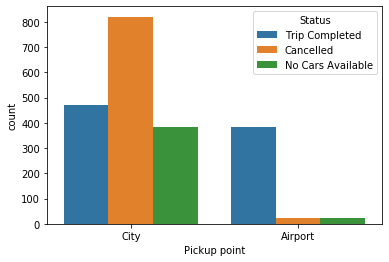

In [25]:
#From the above plot the higest number of cancellations are in the "Morning Rush" time slot
df_Morning_Rush=df[df.Time_Slot=='Morning-Rush']
sns.countplot(x = "Pickup point", hue = "Status", data = df_Morning_Rush)

In [29]:
df_airport_cancelled=df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"] == "Airport") & (df_Morning_Rush["Status"] == "Cancelled")]
len(df_airport_cancelled.index)

23

In [31]:
df_city_cancelled=df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="City") &(df_Morning_Rush["Status"] == "Cancelled")]
len(df_city_cancelled.index)

820

In [33]:
# let's look at the supply and demand in morning rush hour in the city
df_city_completed_morning_rush=df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="City") &(df_Morning_Rush["Status"] == "Trip Completed")]
len(df_city_completed_morning_rush.index)

472

In [34]:
df_city_morning_rush=df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="City")]
len(df_city_morning_rush.index)

1677

In [35]:
# let's look at the supply and demand in morning rush hour at the airport
df_airport_completed_morning_rush=df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="Airport") &(df_Morning_Rush["Status"] == "Trip Completed")]
len(df_airport_completed_morning_rush.index)

382

In [36]:
df_airport_morning_rush=df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"]=="Airport")]
len(df_airport_morning_rush.index)

426

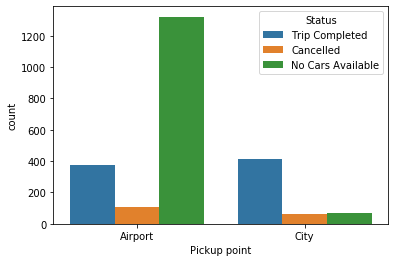

In [37]:
# let's look at the supply and demand in evening rush hour
df_evening_rush=df[df.Time_Slot=='Evening-Rush']
sns.countplot(x = "Pickup point", hue = "Status", data = df_evening_rush)

In [38]:
df_city_completed_evening_rush=df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_city_completed_evening_rush.index)

411

In [39]:
df_city_evening_rush=df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City")]
len(df_city_evening_rush.index)

542

In [41]:
df_airport_completed_evening_rush=df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_airport_completed_evening_rush.index)

373

In [42]:
df_airport_evening_rush=df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport")]
len(df_airport_evening_rush.index)

1800

In [43]:
# let's look at the severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening rush
df_airport_cancelled_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Cancelled")]
len(df_airport_cancelled_evening_rush.index)

106

In [44]:
df_city_cancelled_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Cancelled")]
len(df_city_cancelled_evening_rush.index)

60

In [47]:
# severity of problem by location in Morning Rush (Unavailability of Cars)
df_airport_unavailable_morning_rush  = df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"] == "Airport") & (df_Morning_Rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_morning_rush.index)

21

In [48]:
df_city_unavailable_morning_rush  = df_Morning_Rush.loc[(df_Morning_Rush["Pickup point"] == "City") & (df_Morning_Rush["Status"] == "No Cars Available")]
len(df_city_unavailable_morning_rush.index)

385

In [49]:
# severity of problem by location in Evening Rush (Unavailability of Cars)
df_airport_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_evening_rush.index)

1321

In [50]:
df_city_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_evening_rush.index)


71

In [51]:
# Let's create pie charts instead of a count plots
def PIE_CHARTS(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    
    """
    labels=dataframe.index.values
    sizes=dataframe.Status.values
    fig1,ax1=plt.subplots()
    ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    

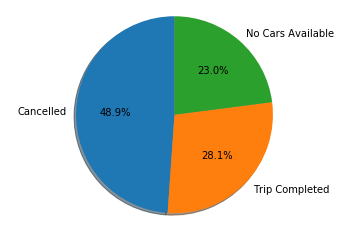

In [55]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Rush where pickup point is City
df_city = df.loc[(df["Pickup point"] == "City") & (df.Time_Slot == "Morning-Rush")]
df_city_count = pd.DataFrame(df_city['Status'].value_counts())
PIE_CHARTS(df_city_count)

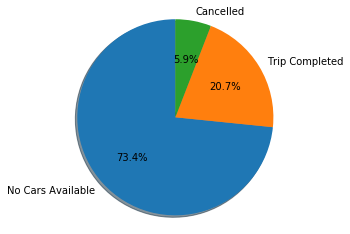

In [66]:
# Status of trips @ Evening Rush where pickup point is Airport
df_airport = df.loc[(df["Pickup point"] == "Airport") & (df.Time_Slot == "Evening-Rush")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
PIE_CHARTS(df_airport_count)